# Introduccion
Este ejercicio didactico fue disenado para mejorar las habilidades de manipulaci on de datos y aprendizaje autom atico utilizando el conjunto de datos
UCI Credit Card. El objetivo de este ejercicio es ayudar a los participantes a
entender c omo aplicar t ecnicas b ́asicas de limpieza de datos, an alisis exploratorio de datos, visualizaci on de datos y aprendizaje autom atico para predecir si un cliente incumplir a o no con el pago de su tarjeta de credito en el siguiente mes

## Variables
tenemos 25 variables

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

## plan

### ¿qué tan bien podemos predecir, mes a mes, la morosidad de nuestros clientes?


El cuaderno está estructurado de la siguiente manera:

* Primera exploración: solo para ver lo que tenemos.
* Limpieza: hora de tomar decisiones sobre las etiquetas no documentadas (asi es la vida real tenemos datos sin etiquetas y tenemos que tomar decisiones.
* Ingeniería de características: hora de ser creativo (saber que preguntar y que usar)
* Resultado final y lecciones aprendidas


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

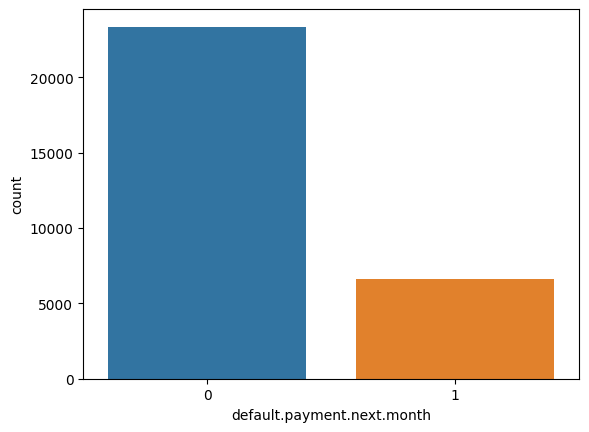

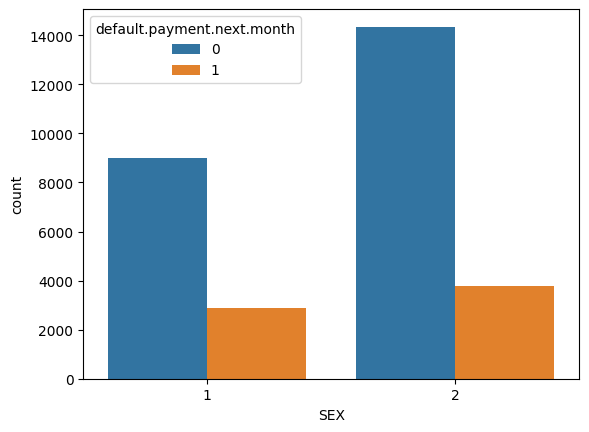

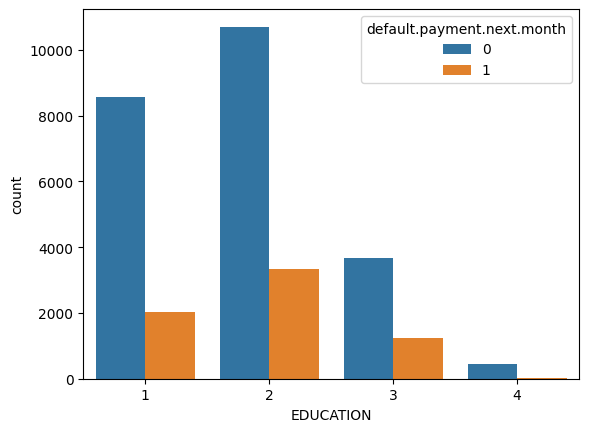

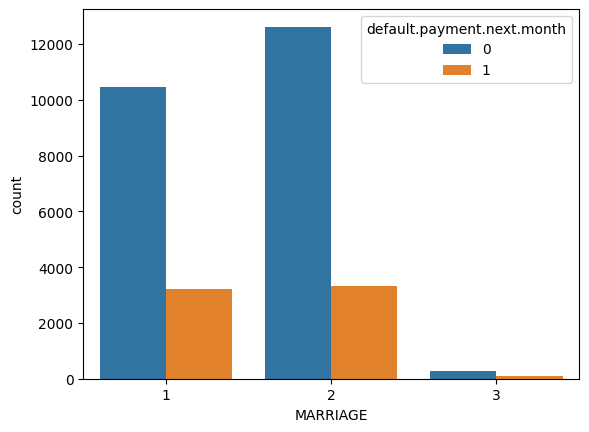

Regresión logística:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.68      0.23      0.35      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000

Árboles de decisión:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      7040
           1       0.39      0.42      0.40      1960

    accuracy                           0.73      9000
   macro avg       0.61      0.62      0.61      9000
weighted avg       0.74      0.73      0.73      9000

Redes neuronales:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      7040
           1       0.53      0.36      0.43      1960

    accuracy                           0.79      9000
   macro avg       0.68      0.64      0.65      9000
weighted av

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el conjunto de datos
url = "/content/UCI_Credit_Card.csv"
df = pd.read_csv(url)

# Explorar las primeras filas del conjunto de datos
print(df.head())

# Limpiar los datos
df["EDUCATION"] = df["EDUCATION"].replace({5: 4, 6: 4, 0:4})
df["MARRIAGE"] = df["MARRIAGE"].replace({0: 3})

# Análisis exploratorio y visualización de datos
sns.countplot(x="default.payment.next.month", data=df)
plt.show()

sns.countplot(x="SEX", hue="default.payment.next.month", data=df)
plt.show()

sns.countplot(x="EDUCATION", hue="default.payment.next.month", data=df)
plt.show()

sns.countplot(x="MARRIAGE", hue="default.payment.next.month", data=df)
plt.show()

# Preparar los datos para el aprendizaje automático
X = df.drop(["ID", "default.payment.next.month"], axis=1)
y = df["default.payment.next.month"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Regresión logística:\n", classification_report(y_test, y_pred_log_reg))

# Árboles de decisión
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Árboles de decisión:\n", classification_report(y_test, y_pred_dt))

# Redes neuronales
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("Redes neuronales:\n", classification_report(y_test, y_pred_mlp))

La función classification_report de scikit-learn genera un informe de texto que muestra las principales métricas de clasificación. En particular, para problemas de clasificación binaria como este, el informe incluirá métricas para ambas clases, en este caso, clase 0 (no incumplimiento) y clase 1 (incumplimiento).

Las métricas incluyen:

Precisión (Precision): La proporción de verdaderos positivos respecto al total de positivos predichos.

Sensibilidad (Recall): La proporción de verdaderos positivos respecto al total de verdaderos positivos y falsos negativos.

F1-score: Es la media armónica entre la precisión y la sensibilidad, ofreciendo un equilibrio entre ambas métricas. Un valor de F1-score cercano a 1 indica un buen rendimiento del clasificador, mientras que un valor cercano a 0 indica un rendimiento deficiente.

Dado que se trata de un problema de clasificación binaria, el informe mostrará dos valores de F1-score, uno para cada clase. Esto es útil para evaluar el rendimiento del clasificador en ambas clases por separado, especialmente en problemas donde el desequilibrio de clases es una preocupación. En este caso, al balancear las clases, se busca tener un rendimiento equilibrado en ambas clases, lo que puede verse reflejado en los dos valores de F1-score.

Importa las bibliotecas de Python necesarias para el análisis de datos y aprendizaje automático (Pandas, NumPy, Seaborn, Matplotlib y Scikit-learn).

2-3. Define la URL del conjunto de datos alojado en GitHub y carga el conjunto de datos en un DataFrame de Pandas llamado "df".
Muestra las primeras filas del conjunto de datos para verificar que se haya cargado correctamente.

5-6. Limpia los datos reemplazando valores desconocidos en las columnas "EDUCATION" y "MARRIAGE".

Crea un gráfico de barras para visualizar la distribución de la variable objetivo "default.payment.next.month".

8-10. Crea gráficos de barras para visualizar la relación entre las variables categóricas "SEX", "EDUCATION", "MARRIAGE" y la variable objetivo.

11-13. Prepara los datos para el aprendizaje automático dividiendo el DataFrame en variables predictoras (X) y la variable objetivo (y). Se elimina la columna "ID" porque no aporta información relevante para el modelo.
Divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split.

15-17. Escala las características utilizando StandardScaler para mejorar el rendimiento de los algoritmos de aprendizaje automático.

18-20. Entrena y evalúa un modelo de regresión logística. Ajusta el modelo utilizando el conjunto de entrenamiento y realiza predicciones en el conjunto de prueba. Luego, imprime un informe de clasificación para evaluar el rendimiento del modelo.

21-23. Entrena y evalúa un modelo de árbol de decisión siguiendo un proceso similar al utilizado para la regresión logística.

24-26. Entrena y evalúa un modelo de red neuronal (MLP) siguiendo un proceso similar al utilizado para la regresión logística y el árbol de decisión.

Al ejecutar este código, se entrena y evalúa cada uno de los modelos de aprendizaje automático (regresión logística, árbol de decisión y red neuronal) en el conjunto de datos UCI_Credit_Card. Los informes de clasificación y las visualizaciones de datos ayudan a comprender el rendimiento de cada modelo y las relaciones entre las variables.

In [7]:
# sin escalamiento
# Datos de un cliente (sustituye los valores por los datos reales)
# new_client_data = np.array([[LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6]])

new_client_data = np.array([[140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000
]])

# Escalar los datos del cliente
new_client_data_scaled = (new_client_data)

# Realizar predicción con el modelo seleccionado (en este caso, regresión logística)
prediction = log_reg.predict(new_client_data_scaled)

# Interpretar el resultado de la predicción
if prediction[0] == 1:
    print("El cliente probablemente incumplirá con el pago de su tarjeta de crédito en el siguiente mes.")
else:
    print("El cliente probablemente NO incumplirá con el pago de su tarjeta de crédito en el siguiente mes.")


El cliente probablemente NO incumplirá con el pago de su tarjeta de crédito en el siguiente mes.


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
# con escalamiento
# Datos de un cliente (sustituye los valores por los datos reales)
# new_client_data = np.array([[LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6]])

# new_client_data = np.array([[140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000]])

new_client_data = np.array([[70000,2,2,2,26,2,0,0,2,2,2,41087,42445,45020,44006,46905,46012,2007,3582,0,3601,0,1820]])

# Escalar los datos del cliente
new_client_data_scaled = scaler.transform(new_client_data)

# Realizar predicción con el modelo seleccionado (en este caso, regresión logística)
prediction = log_reg.predict(new_client_data_scaled)

# Interpretar el resultado de la predicción
if prediction[0] == 1:
    print("El cliente probablemente incumplirá con el pago de su tarjeta de crédito en el siguiente mes.")
else:
    print("El cliente probablemente NO incumplirá con el pago de su tarjeta de crédito en el siguiente mes.")


El cliente probablemente NO incumplirá con el pago de su tarjeta de crédito en el siguiente mes.


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


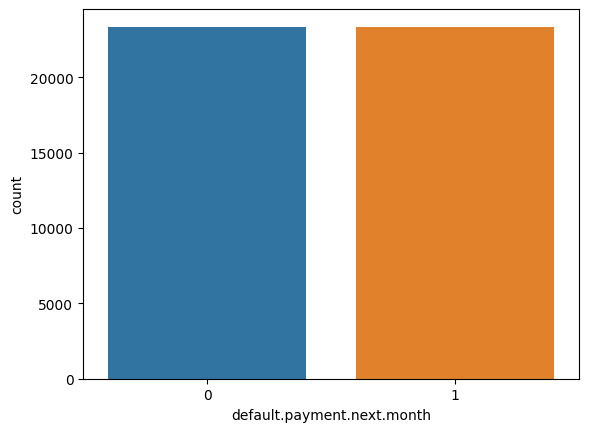

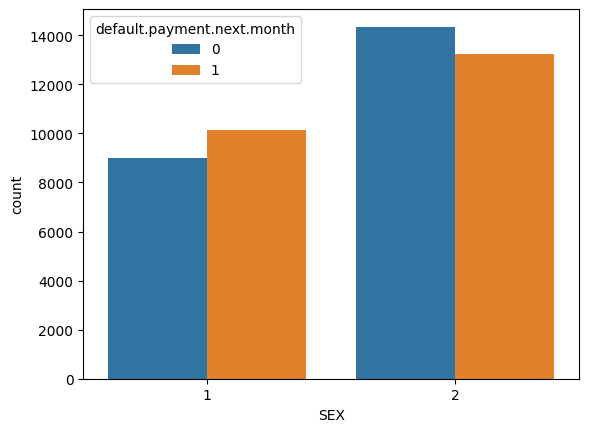

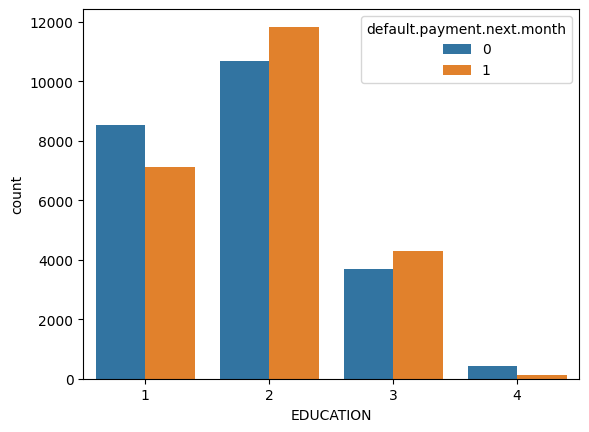

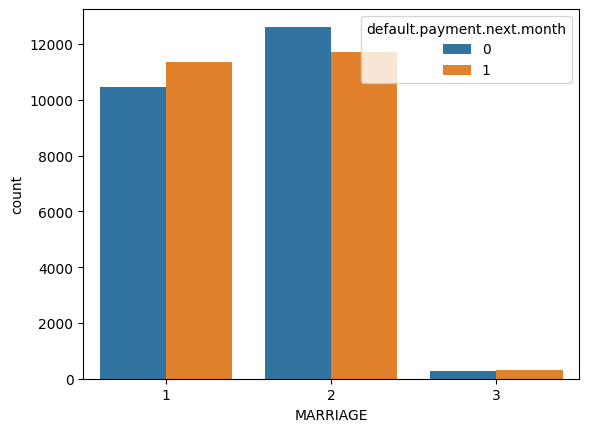

              precision    recall  f1-score   support

           0       0.67      0.70      0.69      4703
           1       0.68      0.65      0.67      4643

    accuracy                           0.68      9346
   macro avg       0.68      0.68      0.68      9346
weighted avg       0.68      0.68      0.68      9346

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      4703
           1       0.82      0.97      0.89      4643

    accuracy                           0.88      9346
   macro avg       0.89      0.88      0.88      9346
weighted avg       0.89      0.88      0.88      9346

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      4703
           1       0.75      0.70      0.72      4643

    accuracy                           0.73      9346
   macro avg       0.73      0.73      0.73      9346
weighted avg       0.73      0.73      0.73      9346



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample

# Cargar el conjunto de datos
url = "/content/UCI_Credit_Card.csv"
df = pd.read_csv(url)

# Limpiar los datos
df["EDUCATION"] = df["EDUCATION"].replace({5: 4, 6: 4, 0:4})
df["MARRIAGE"] = df["MARRIAGE"].replace(0, 3)

# Balancear las clases utilizando la técnica de remuestreo
df_majority = df[df["default.payment.next.month"] == 0]
df_minority = df[df["default.payment.next.month"] == 1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Visualización de datos
sns.countplot(x="default.payment.next.month", data=df_balanced)
plt.show()

sns.countplot(x="SEX", hue="default.payment.next.month", data=df_balanced)
plt.show()

sns.countplot(x="EDUCATION", hue="default.payment.next.month", data=df_balanced)
plt.show()

sns.countplot(x="MARRIAGE", hue="default.payment.next.month", data=df_balanced)
plt.show()

# Preparación de los datos para el aprendizaje automático
X = df_balanced.drop(["ID", "default.payment.next.month"], axis=1)
y = df_balanced["default.payment.next.month"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento y evaluación de un modelo de regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred_log_reg))

# Entrenamiento y evaluación de un modelo de árbol de decisión
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))

# Entrenamiento y evaluación de un modelo de red neuronal
mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)
print(classification_report(y_test, y_pred_mlp))


In [14]:
# con escalamiento
# Datos de un cliente (sustituye los valores por los datos reales)
# new_client_data = np.array([[LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6]])

# new_client_data = np.array([[140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000]])

new_client_data = np.array([[70000,2,2,2,26,2,0,0,2,2,2,41087,42445,45020,44006,46905,46012,2007,3582,0,3601,0,1820]])

# Escalar los datos del cliente
new_client_data_scaled = scaler.transform(new_client_data)

# Realizar predicción con el modelo seleccionado (en este caso, regresión logística)
prediction = log_reg.predict(new_client_data_scaled)

# Interpretar el resultado de la predicción
if prediction[0] == 1:
    print("El cliente probablemente incumplirá con el pago de su tarjeta de crédito en el siguiente mes.")
else:
    print("El cliente probablemente NO incumplirá con el pago de su tarjeta de crédito en el siguiente mes.")


El cliente probablemente incumplirá con el pago de su tarjeta de crédito en el siguiente mes.


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
